# Employee Turnover Prediction Analysis

## Project Overview
**Objective**: Build and optimize logistic regression models to predict employee turnover, comparing baseline performance with regularized (L1 & L2) models.

**Dataset**: Employee Turnover dataset (900 rows × 15 columns)
             `From KAGGEL`
- **Target**: `Employee_Turnover` (binary classification)
- **Features**: 14 employee metrics reflecting corporate scenarios

**Tasks**:
1. Build a baseline Logistic Regression model
2. Improve it using Regularization (L1 & L2)
3. Compare their performances and recommend the best model

## 1. Import Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (r2_score, accuracy_score, precision_score, 
                           recall_score, f1_score, classification_report, 
                            roc_auc_score)
from sklearn.preprocessing import StandardScaler

#setting style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Data Loading & Initial Exploration

In [ ]:
# Load the dataset
emp_df = pd.read_csv("employee_rentention.csv")

#display basic information
print(f"Dataset Shape: {emp_df.shape}")
print(f"\nNumber of Features: {emp_df.shape[1]}")
print(f"Number of Samples: {emp_df.shape[0]}")

Dataset Shape: (1350, 16)

Number of Features: 16
Number of Samples: 1350


In [20]:
display(emp_df.head(10))

emp_df.info()

,Job_Satisfaction,Performance_Rating,Years_At_Company,Work_Life_Balance,Distance_From_Home,Monthly_Income,Education_Level,Age,Num_Companies_Worked,Employee_Role,Annual_Bonus,Training_Hours,Department,Annual_Bonus_Squared,Annual_Bonus_Training_Hours_Interaction,Employee_Turnover
0,0.562326,0.141129,0.123989,0.347583,0.330353,0.328853,0.600933,0.315990,0.768736,0.090671,0.324786,0.669193,0.602932,0.105486,0.217344,0
1,0.017041,0.559047,0.511203,0.793908,0.423550,0.553450,0.742009,0.897146,0.380035,0.601633,0.694611,0.043271,0.800761,0.482484,0.030056,0
2,0.774699,0.604371,0.798174,0.260500,0.804034,0.131800,0.775178,0.830947,0.218726,0.972936,0.153476,0.701336,0.705275,0.023555,0.107638,1
3,0.628174,0.385249,0.230104,0.516809,0.272248,0.589249,0.482409,0.090507,0.402746,0.132842,0.305973,0.549688,0.600531,0.093620,0.168190,0
4,0.799183,0.199967,0.839029,0.247927,0.341934,0.076818,0.055356,0.680860,0.923341,0.493017,0.844094,0.793751,0.664679,0.712494,0.670000,0
5,0.180463,0.624730,0.027877,0.735142,0.042222,0.674080,0.212369,0.591191,0.275975,0.022403,0.685537,0.448659,0.724231,0.469961,0.307572,0
6,0.438281,0.096155,0.360635,0.841280,0.973046,0.845082,0.162228,0.345509,0.831188,0.553896,0.776186,0.777783,0.071088,0.602464,0.603704,0
7,0.031835,0.775622,0.126102,0.780592,0.616668,0.474318,0.480459,0.092658,0.222781,0.642847,0.873098,0.237203,0.084777,0.762300,0.207101,0
8,0.610363,0.877508,0.594027,0.443167,0.328582,0.970093,0.478249,0.359247,0.907728,0.811864,0.588739,0.566064,0.497351,0.346614,0.333264,1
9,0.472283,0.470477,0.086397,0.173957,0.278577,0.587710,0.996112,0.367684,0.848250,0.013799,0.773083,0.461490,0.666163,0.597657,0.356770,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Job_Satisfaction                         1350 non-null   float64
 1   Performance_Rating                       1350 non-null   float64
 2   Years_At_Company                         1350 non-null   float64
 3   Work_Life_Balance                        1350 non-null   float64
 4   Distance_From_Home                       1350 non-null   float64
 5   Monthly_Income                           1350 non-null   float64
 6   Education_Level                          1350 non-null   float64
 7   Age                                      1350 non-null   float64
 8   Num_Companies_Worked                     1350 non-null   float64
 9   Employee_Role                            1350 non-null   float64
 10  Annual_Bonus                             1350 no

In [21]:
#check for missing values
missing_values = emp_df.isnull().sum()
missing_percentage = (missing_values / len(emp_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_df = missing_df[missing_df['Missing Values'] > 0]

if len(missing_df) > 0:
    display(missing_df)
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


,Count,Percentage
Employee_Turnover,,
0,678,50.222222
1,672,49.777778


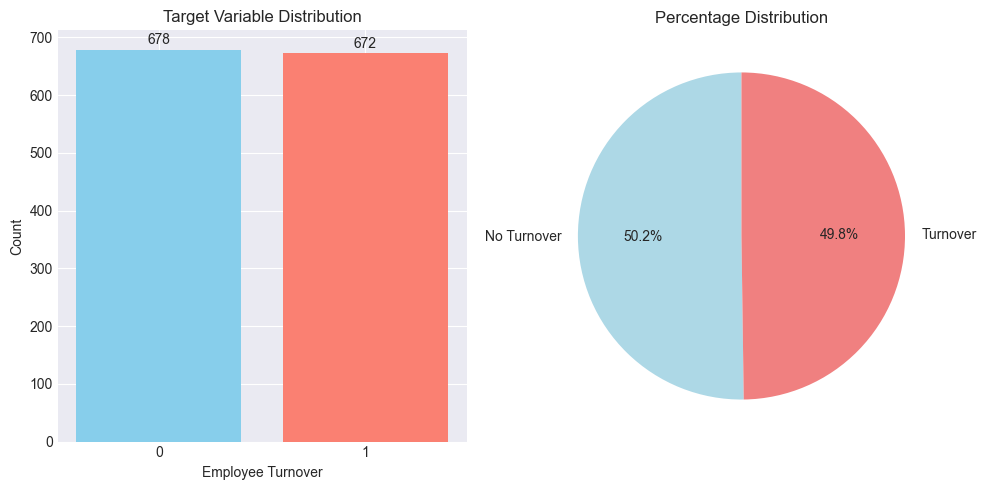

In [22]:
#check target variable distribution

target_distribution = emp_df['Employee_Turnover'].value_counts()
target_percentage = emp_df['Employee_Turnover'].value_counts(normalize=True) * 100

target_df = pd.DataFrame({
    'Count': target_distribution,
    'Percentage': target_percentage
})
display(target_df)

#visualize target distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(target_df.index.astype(str), target_df['Count'], color=['skyblue', 'salmon'])
plt.xlabel('Employee Turnover')
plt.ylabel('Count')
plt.title('Target Variable Distribution')

#add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(target_df['Percentage'], labels=['No Turnover', 'Turnover'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Percentage Distribution')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [23]:
#separate features and target 
X = emp_df.drop("Employee_Turnover", axis=1)
Y = emp_df["Employee_Turnover"]


In [24]:
#standardize features (important for regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features standardized using StandardScaler")

Features standardized using StandardScaler


## 4. Train-Test Split

In [25]:
#split data (50% train, 50% test) with stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.50, random_state=10, stratify=Y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 675 samples
Testing set size: 675 samples
Number of features: 15


## 5. Baseline Logistic Regression Model

Why Logistic Regression?(not linear)
1. Interpretability: Provides coefficient insights
2. Efficiency: Fast training and prediction
3. Probabilistic: Outputs probability scores
4. Baseline: Good benchmark for comparison

In [26]:
#train baseline logistic regression model

baseline_model = LogisticRegression(
    max_iter=1000,
    random_state=10,
    solver='lbfgs'  
)
baseline_model.fit(X_train, Y_train)

#make predictions
Y_predict_baseline = baseline_model.predict(X_test)
Y_prob_baseline = baseline_model.predict_proba(X_test)[:, 1]

#calculate metrics
print(f"Accuracy: {accuracy_score(Y_test, Y_predict_baseline)*100:.2f}%")
print(f"Precision: {precision_score(Y_test, Y_predict_baseline)*100:.2f}%")
print(f"Recall: {recall_score(Y_test, Y_predict_baseline)*100:.2f}%")
print(f"F1-Score: {f1_score(Y_test, Y_predict_baseline)*100:.2f}%")
print(f"R2 Score: {r2_score(Y_test, Y_predict_baseline):.4f}")
print(f"AUC-ROC: {roc_auc_score(Y_test, Y_prob_baseline):.4f}")

#detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_predict_baseline))

Accuracy: 85.78%
Precision: 87.27%
Recall: 83.63%
F1-Score: 85.41%
R2 Score: 0.4311
AUC-ROC: 0.9480

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       339
           1       0.87      0.84      0.85       336

    accuracy                           0.86       675
   macro avg       0.86      0.86      0.86       675
weighted avg       0.86      0.86      0.86       675



In [27]:
#Evauation matrix  for baseline model
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(Y_predict_baseline , Y_test)

print(cm)

[[298  55]
 [ 41 281]]


,Feature,Coefficient,Absolute_Value
4,Distance_From_Home,1.791551,1.791551
0,Job_Satisfaction,1.754915,1.754915
1,Performance_Rating,1.643206,1.643206
3,Work_Life_Balance,1.567221,1.567221
2,Years_At_Company,1.418431,1.418431
13,Annual_Bonus_Squared,0.633231,0.633231
10,Annual_Bonus,-0.520632,0.520632
6,Education_Level,-0.336107,0.336107
5,Monthly_Income,-0.130106,0.130106
14,Annual_Bonus_Training_Hours_Interaction,-0.091274,0.091274


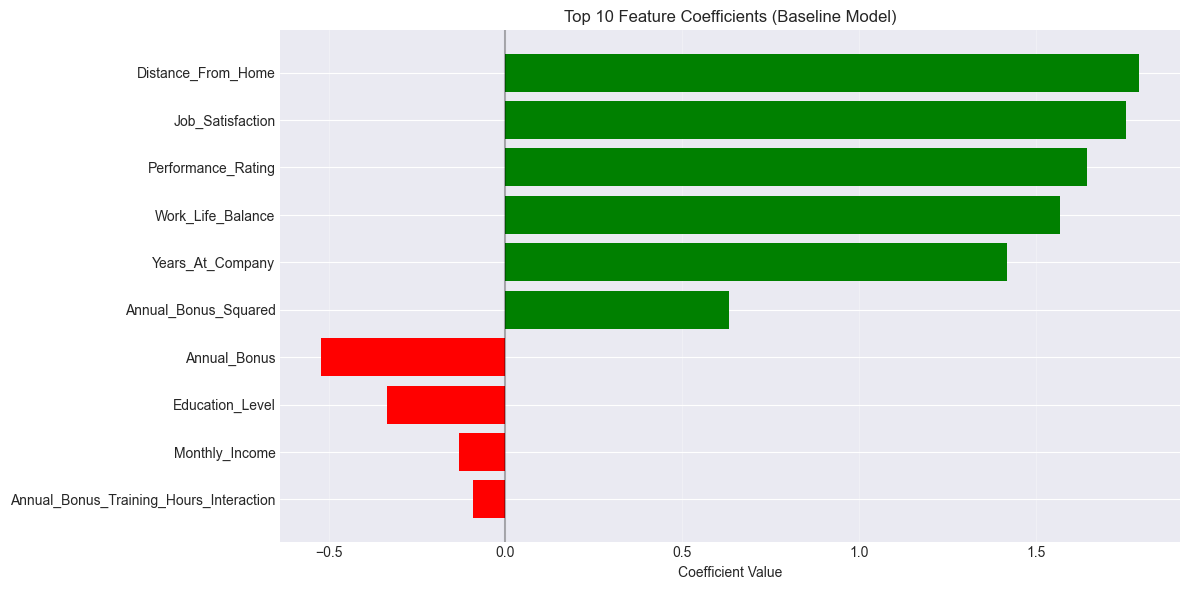

In [28]:
#feature importance from baseline model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': baseline_model.coef_[0],
    'Absolute_Value': np.abs(baseline_model.coef_[0])
}).sort_values('Absolute_Value', ascending=False)

display(feature_importance.head(10))

#visualize feature importance
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(10)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients (Baseline Model)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. Regularized Models

In [29]:
# L1 Regularized Model

l1_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',  # liblinear supports L1
    max_iter=1000,
    random_state=10,
    C=1.0  #inverse of regularization strength
)
l1_model.fit(X_train, Y_train)

Y_predict_l1 = l1_model.predict(X_test)
Y_prob_l1 = l1_model.predict_proba(X_test)[:, 1]

# Calculate metrics
print(f"Accuracy: {accuracy_score(Y_test, Y_predict_l1)*100:.2f}%")
print(f"Precision: {precision_score(Y_test, Y_predict_l1)*100:.2f}%")
print(f"Recall: {recall_score(Y_test, Y_predict_l1)*100:.2f}%")
print(f"F1-Score: {f1_score(Y_test, Y_predict_l1)*100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(Y_test, Y_prob_l1):.4f}")


Accuracy: 85.93%
Precision: 87.08%
Recall: 84.23%
F1-Score: 85.63%
AUC-ROC: 0.9483


/opt/anaconda3/envs/classEnv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/classEnv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


In [30]:
#Evauation matrix for L1
from sklearn.metrics import confusion_matrix 

cm_1 = confusion_matrix(Y_predict_l1 , Y_test)

print(cm_1)

[[297  53]
 [ 42 283]]


### 6.2 L2 Regularization (Ridge)
L2 regularization adds penalty equal to square of coefficients, preventing any single feature from dominating.

In [31]:
# L2 Regularized Model

l2_model = LogisticRegression(
    penalty='l2',
    max_iter=1000,
    random_state=10,
    C=1.0
)
l2_model.fit(X_train, Y_train)

Y_predict_l2 = l2_model.predict(X_test)
Y_prob_l2 = l2_model.predict_proba(X_test)[:, 1]

#Calculate metrics
print(f"Accuracy: {accuracy_score(Y_test, Y_predict_l2)*100:.2f}%")
print(f"Precision: {precision_score(Y_test, Y_predict_l2)*100:.2f}%")
print(f"Recall: {recall_score(Y_test, Y_predict_l2)*100:.2f}%")
print(f"F1-Score: {f1_score(Y_test, Y_predict_l2)*100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(Y_test, Y_prob_l2):.4f}")


Accuracy: 85.78%
Precision: 87.27%
Recall: 83.63%
F1-Score: 85.41%
AUC-ROC: 0.9480


/opt/anaconda3/envs/classEnv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [32]:
#Evauation matrix for L2
from sklearn.metrics import confusion_matrix 

cm_2 = confusion_matrix(Y_predict_l2 , Y_test)

print(cm_2)


[[298  55]
 [ 41 281]]


## 7. Model Comparison

In [33]:
#create comprehensive comparison
models_summary = pd.DataFrame({
    'Model': ['Baseline', 'L1 (Lasso)', 'L2 (Ridge)'],
    'Accuracy': [
        accuracy_score(Y_test, Y_predict_baseline)*100,
        accuracy_score(Y_test, Y_predict_l1)*100,
        accuracy_score(Y_test, Y_predict_l2)*100
    ],
    'Precision': [
        precision_score(Y_test, Y_predict_baseline)*100,
        precision_score(Y_test, Y_predict_l1)*100,
        precision_score(Y_test, Y_predict_l2)*100
    ],
    'Recall': [
        recall_score(Y_test, Y_predict_baseline)*100,
        recall_score(Y_test, Y_predict_l1)*100,
        recall_score(Y_test, Y_predict_l2)*100
    ],
    'F1-Score': [
        f1_score(Y_test, Y_predict_baseline)*100,
        f1_score(Y_test, Y_predict_l1)*100,
        f1_score(Y_test, Y_predict_l2)*100
    ],
    'AUC-ROC': [
        roc_auc_score(Y_test, Y_prob_baseline),
        roc_auc_score(Y_test, Y_prob_l1),
        roc_auc_score(Y_test, Y_prob_l2)
    ],
    'R2_Score': [
        r2_score(Y_test, Y_predict_baseline),
        r2_score(Y_test, Y_predict_l1),
        r2_score(Y_test, Y_predict_l2)
    ]
})
display(models_summary.round(3))

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC,R2_Score
0,Baseline,85.778,87.267,83.631,85.410,0.948,0.431
1,L1 (Lasso),85.926,87.077,84.226,85.628,0.948,0.437
2,L2 (Ridge),85.778,87.267,83.631,85.410,0.948,0.431


/var/folders/s3/7_ps073573349p4rwxh_fxzr0000gn/T/ipykernel_13844/2964122837.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models_summary['Model'], rotation=45)
/var/folders/s3/7_ps073573349p4rwxh_fxzr0000gn/T/ipykernel_13844/2964122837.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models_summary['Model'], rotation=45)
/var/folders/s3/7_ps073573349p4rwxh_fxzr0000gn/T/ipykernel_13844/2964122837.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models_summary['Model'], rotation=45)
/var/folders/s3/7_ps073573349p4rwxh_fxzr0000gn/T/ipykernel_13844/2964122837.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

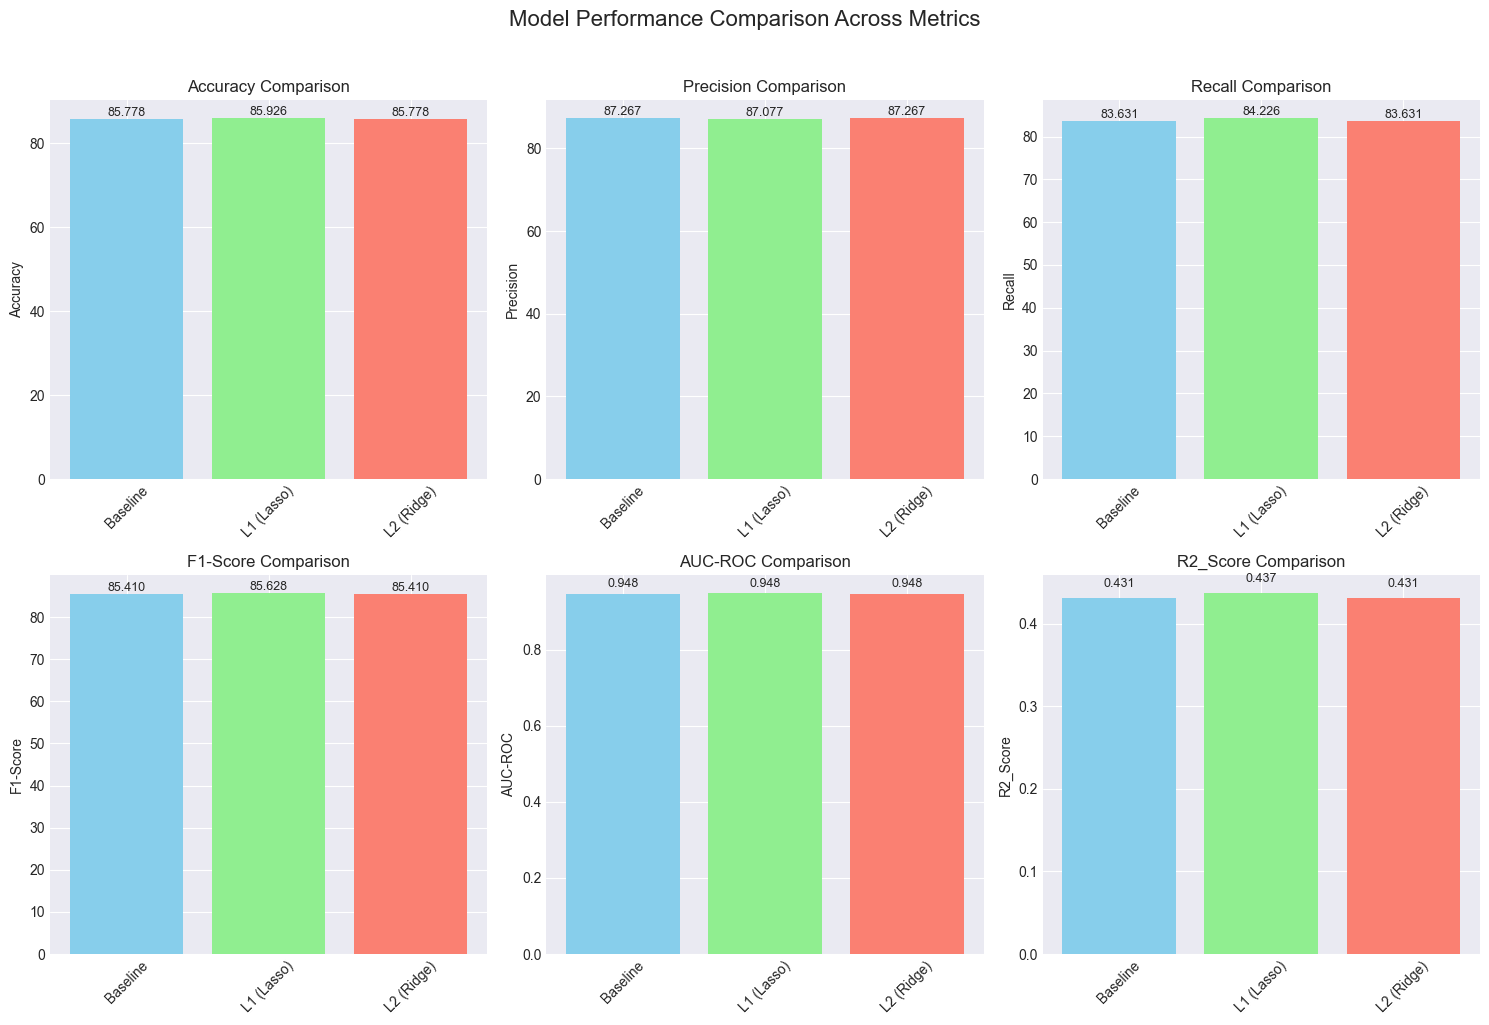

In [34]:
#visual comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'R2_Score']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx//3, idx%3]
    bars = ax.bar(models_summary['Model'], models_summary[metric], 
                  color=['skyblue', 'lightgreen', 'salmon'])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xticklabels(models_summary['Model'], rotation=45)
    
    #add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.suptitle('Model Performance Comparison Across Metrics', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save the trained model to a file
with open("iris_model.pkl", "wb") as file:  #
    pickle.dump(KNN, file)